# Regresión No Lineal para Predicción de Humedad/Temperatura
Este notebook implementa un modelo de regresión no lineal (polinómica) para predecir valores continuos, replicando el análisis del notebook original.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
# Cargar el dataset (ajusta la ruta si es necesario)
dataset = pd.read_csv('../dataset/ML1_temperature.xlsx - Hoja1.csv', decimal=',')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

In [7]:
# Separar en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# Transformar variables para regresión polinómica
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)

In [9]:
# Entrenar modelo
model = LinearRegression()
model.fit(x_train_poly, y_train)
y_train_pred = model.predict(x_train_poly)
y_val_pred = model.predict(x_val_poly)

In [10]:
# Evaluar desempeño
train_loss = mean_squared_error(y_train, y_train_pred)
val_loss = mean_squared_error(y_val, y_val_pred)
print(f'Training Loss (MSE): {train_loss}')
print(f'Validation Loss (MSE): {val_loss}')

Training Loss (MSE): 0.07990928199032821
Validation Loss (MSE): 0.12044113240249725


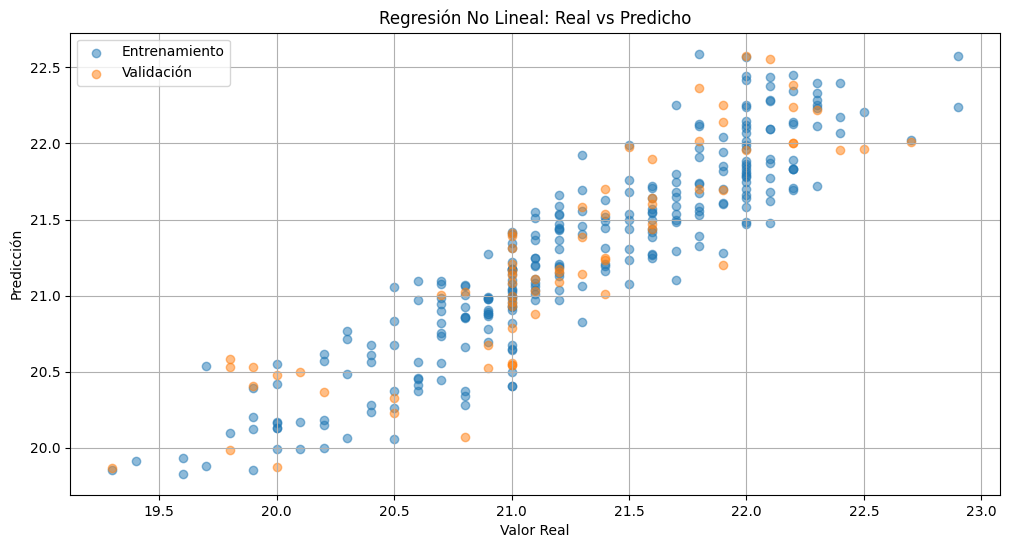

In [11]:
# Graficar resultados
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Entrenamiento')
plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validación')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Regresión No Lineal: Real vs Predicho')
plt.legend()
plt.grid(True)
plt.show()